# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [53]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
sinasc_1 = sinasc_raw[['munResLat','ESCMAE', 'IDADEMAE', 'munResArea','munResAlt', 'SEMAGESTAC']]
sinasc_1.head()

,munResLat,ESCMAE,IDADEMAE,munResArea,munResAlt,SEMAGESTAC
0,-11.93554,8 a 11 anos,19,7067.025,338.0,39.0
1,-11.93554,8 a 11 anos,29,7067.025,338.0,38.0
2,-11.93554,8 a 11 anos,37,7067.025,338.0,40.0
3,-12.13178,12 anos ou mais,30,3958.273,397.0,38.0
4,-11.93554,8 a 11 anos,30,7067.025,338.0,38.0


In [9]:
latitude = pd.cut(sinasc_1['munResLat'], [-20, -10.5, 0])
agrupamento0 = sinasc_1[['IDADEMAE', 'SEMAGESTAC']].groupby(latitude)
agrupamento0.agg([('Soma', 'sum'),('Média', 'mean'), ('Máxima', 'max'), ('Mínima', 'min'), ('Mediana',np.median),('Variância',  np.var),
                                                                                   ('Desvio', np.std)])

IDADEMAE                                                        \
                   Soma      Média Máxima Mínima Mediana  Variância    Desvio   
munResLat                                                                       
(-20.0, -10.5]   340143  26.178943     53     12      26  39.947272  6.320385   
(-10.5, 0.0]     365094  26.014964     52     11      25  41.572355  6.447663   

               SEMAGESTAC                                                       
                     Soma      Média Máxima Mínima Mediana Variância    Desvio  
munResLat                                                                       
(-20.0, -10.5]   482665.0  38.545360   45.0   19.0    39.0  4.049895  2.012435  
(-10.5, 0.0]     511951.0  38.588302   45.0   21.0    39.0  4.083319  2.020722

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [10]:
area = pd.cut(sinasc_1['munResArea'], [0, 3000, 10000])
agrupamento1 = sinasc_1[['IDADEMAE', 'SEMAGESTAC']].groupby(area)
agrupamento1.agg([('Soma', 'sum'),('Média', 'mean'), ('Máxima', 'max'), ('Mínima', 'min'), ('Mediana',np.median),('Variância',  np.var),
                                                                                   ('Desvio', np.std)])

IDADEMAE                                                        \
                  Soma      Média Máxima Mínima Mediana  Variância    Desvio   
munResArea                                                                     
(0, 3000]       137389  26.324775     53     11      26  39.759775  6.305535   
(3000, 10000]   265216  25.836922     53     12      25  39.124806  6.254982   

              SEMAGESTAC                                                       
                    Soma      Média Máxima Mínima Mediana Variância    Desvio  
munResArea                                                                     
(0, 3000]       197469.0  38.470485   45.0   21.0    39.0  3.515350  1.874927  
(3000, 10000]   382173.0  38.611134   45.0   19.0    39.0  4.033773  2.008426

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:
alt_max = sinasc_1['munResAlt'].max()
alt_min = sinasc_1['munResAlt'].min()
quartil = (alt_max - alt_min)/4
print(alt_max, alt_min, quartil)

595.0 85.0 127.5


In [12]:
alt = pd.cut(sinasc_1['munResAlt'], [85, 212.5, 340, 467.5, 595])
agrupamento2 = sinasc_1[['IDADEMAE', 'SEMAGESTAC']].groupby(alt)
agrupamento2.agg([('Soma', 'sum'),('Média', 'mean'), ('Máxima', 'max'), ('Mínima', 'min'),
                  ('Mediana',np.median),('Variância',  np.var),('Desvio', np.std)])

IDADEMAE                                                        \
                   Soma      Média Máxima Mínima Mediana  Variância    Desvio   
munResAlt                                                                       
(85.0, 212.5]    544762  26.025320     52     11      25  40.976283  6.401272   
(212.5, 340.0]   100205  26.369737     53     13      26  39.986186  6.323463   
(340.0, 467.5]     9733  26.448370     47     14      26  42.051823  6.484738   
(467.5, 595.0]    42030  26.433962     46     14      26  39.827921  6.310937   

               SEMAGESTAC                                                       
                     Soma      Média Máxima Mínima Mediana Variância    Desvio  
munResAlt                                                                       
(85.0, 212.5]    763907.0  38.563633   45.0   19.0    39.0  4.194570  2.048065  
(212.5, 340.0]   142798.0  38.500404   45.0   21.0    39.0  3.682106  1.918881  
(340.0, 467.5]    14217.0  38.633152   42.0   26.0    39.0  3.197481  1.788150  
(467.5, 595.0]    61417.0  38.700063   44.0   22.0    39.0  3.614899  1.901289

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [54]:
sinasc_2 = sinasc_raw[['DTNASC','munResNome','ESCMAE', 'IDADEMAE', 'IDADEPAI','SEMAGESTAC', 'PESO']].copy()
sinasc_2.head()

,DTNASC,munResNome,ESCMAE,IDADEMAE,IDADEPAI,SEMAGESTAC,PESO
0,2019-02-19,Alta Floresta D'Oeste,8 a 11 anos,19,26.0,39.0,3685
1,2019-02-21,Alta Floresta D'Oeste,8 a 11 anos,29,24.0,38.0,3055
2,2019-02-25,Alta Floresta D'Oeste,8 a 11 anos,37,32.0,40.0,3460
3,2019-03-20,Alto Alegre dos Parecis,12 anos ou mais,30,24.0,38.0,2982
4,2019-03-23,Alta Floresta D'Oeste,8 a 11 anos,30,27.0,38.0,3310


In [55]:
linhas = sinasc_2.index
num_linhas = len(linhas)
print(num_linhas)

27028


In [56]:
sinasc_2.drop(sinasc_2.loc[sinasc_2['munResNome']=='Município ignorado - RO'].index, inplace=True)


In [57]:
linhas = sinasc_2.index
num_linhas = len(linhas)
print(num_linhas)

27027


In [58]:
imediatas = {
    'Candeias do Jamari': 'Porto Velho',
    'Guajará-Mirim': 'Porto Velho',
    'Itapuã do Oeste': 'Porto Velho',
    'Nova Mamoré': 'Porto Velho',
    'Porto Velho': 'Porto Velho',
    'Jaru': 'Jaru',
    "Machadinho D'Oeste": 'Jaru',
    'Vale do Anari': 'Jaru',
    'Theobroma': 'Jaru',
    'Governador Jorge Teixeira': 'Jaru',
    'Município ignorado - RO': 'Ignorado',
    'Alto Paraíso': 'Ariquemes',
    'Ariquemes': 'Ariquemes',
    'Buritis': 'Ariquemes',
    'Cacaulândia': 'Ariquemes',
    'Campo Novo de Rondônia': 'Ariquemes',
    'Cujubim': 'Ariquemes',
    'Monte Negro': 'Ariquemes',
    'Rio Crespo': 'Ariquemes',
    "Alvorada D'Oeste": 'Ji-Paraná',
    'Costa Marques': 'Ji-Paraná',
    'Ji-Paraná': 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Nova União': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Presidente Médici': 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Seringueiras': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Urupá': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',
    "Alta Floresta D'Oeste": 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Cacoal': 'Cacoal',
    'Castanheiras': 'Cacoal',
    "Espigão D'Oeste": 'Cacoal',
    'Ministro Andreazza': 'Cacoal',
    "Nova Brasilândia D'Oeste": 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Parecis': 'Cacoal',
    'Pimenta Bueno': 'Cacoal',
    'Primavera de Rondônia': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    "Santa Luzia D'Oeste": 'Cacoal',
    "São Felipe D'Oeste": 'Cacoal',
    'Cabixi': 'Vilhena',
    'Cerejeiras': 'Vilhena',
    'Chupinguaia': 'Vilhena',
    'Colorado do Oeste': 'Vilhena',
    'Corumbiara': 'Vilhena',
    'Pimenteiras do Oeste': 'Vilhena',
    'Vilhena': 'Vilhena'
}


In [59]:
sinasc_2['IMEDIATAS'] = sinasc_2['munResNome'].map(imediatas) 

In [60]:
sinasc_2.loc[:,'DTNASC'] = pd.to_datetime(sinasc_2['DTNASC'])

In [61]:
sinasc_2.set_index('DTNASC', inplace=True)

In [62]:
sinasc_2['MES'] = sinasc_2.index.month

In [63]:
porto_velho = sinasc_2[sinasc_2['IMEDIATAS'] == 'Porto Velho'].groupby('MES')['IDADEMAE'].mean()
jaru = sinasc_2[sinasc_2['IMEDIATAS'] == 'Jaru'].groupby('MES')['IDADEMAE'].mean()
ariquemes = sinasc_2[sinasc_2['IMEDIATAS'] == 'Ariquemes'].groupby('MES')['IDADEMAE'].mean()
ji_parana = sinasc_2[sinasc_2['IMEDIATAS'] == 'Ji-Paraná'].groupby('MES')['IDADEMAE'].mean()
cacoal = sinasc_2[sinasc_2['IMEDIATAS'] == 'Cacoal'].groupby('MES')['IDADEMAE'].mean()
vilhena = sinasc_2[sinasc_2['IMEDIATAS'] == 'Vilhena'].groupby('MES')['IDADEMAE'].mean()

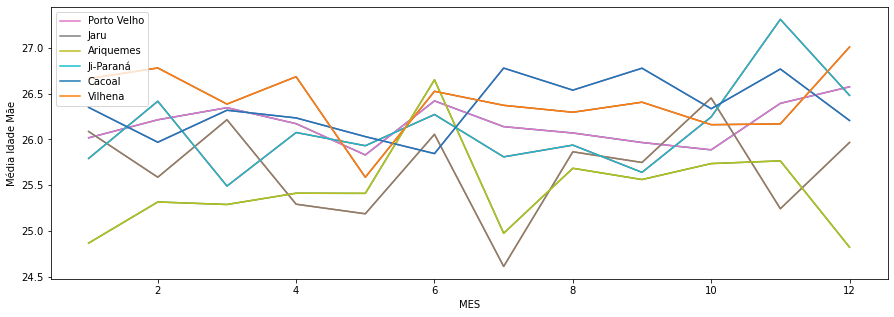

In [64]:
porto_velho.plot(figsize=[15,5])
jaru.plot()
ariquemes.plot()
ji_parana.plot()
cacoal.plot()
vilhena.plot()
line1, = plt.plot(porto_velho, label='Porto Velho')
line2, = plt.plot(jaru, label='Jaru')
line3, = plt.plot(ariquemes, label='Ariquemes')
line4, = plt.plot(ji_parana, label='Ji-Paraná')
line5, = plt.plot(cacoal, label='Cacoal')
line6, = plt.plot(vilhena, label='Vilhena')


plt.ylabel('Média Idade Mãe')
plt.legend([line1, line2, line3, line4, line5, line6], ['Porto Velho', 'Jaru', 'Ariquemes', 'Ji-Paraná', 'Cacoal', 'Vilhena']);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [65]:
IDHmun = {
    'Porto Velho': 0.736,
    'Vilhena': 0.731,
    'Cacoal': 0.718,
    'Ji-Paraná': 0.714,
    'Pimenta Bueno': 0.710,
    'Ariquemes': 0.702,
    'Rolim de Moura': 0.700,
    'Cerejeiras': 0.692,
    'Jaru':	0.689,
    'Colorado do Oeste': 0.685,
    'Ouro Preto do Oeste': 0.682,
    "Espigão D'Oeste": 0.672,
    "Santa Luzia D'Oeste": 0.670,
    'Pimenteiras do Oeste':	0.665,
    'Presidente Médici': 0.664,
    'Castanheiras':	0.658,
    'Guajará-Mirim': 0.657,
    'Chupinguaia': 0.652,
    'Cabixi': 0.650,
    'Candeias do Jamari': 0.649,
    "São Felipe D'Oeste": 0.649,
    'Cacaulândia': 0.646,
    'São Miguel do Guaporé': 0.646,
    'Mirante da Serra': 0.643,
    "Alvorada D'Oeste": 0.643,
    'Teixeirópolis': 0.643,
    "Nova Brasilândia D'Oeste": 0.643,
    'Rio Crespo': 0.643,
    'Primavera de Rondônia': 0.641,
    "Alta Floresta D'Oeste": 0.641,
    'Ministro Andreazza': 0.638,
    'Novo Horizonte do Oeste': 0.634,
    'Vale do Paraíso': 0.627,
    'Alto Paraíso': 0.625,
    'Parecis': 0.617,
    'Buritis': 0.616,
    'Itapuã do Oeste': 0.614,
    'Corumbiara': 0.613,
    'Cujubim': 0.612,
    'Costa Marques': 0.611,
    'São Francisco do Guaporé': 0.611,
    'Urupá': 0.609,
    'Monte Negro': 0.607,
    'Seringueiras': 0.598,
    'Governador Jorge Teixeira': 0.596,
    "Machadinho D'Oeste": 0.596,
    'Campo Novo de Rondônia': 0.593,
    'Alto Alegre dos Parecis': 0.592,
    'Theobroma': 0.589,
    'Nova União': 0.587,
    'Nova Mamoré': 0.587,
    'Vale do Anari': 0.584
}

In [66]:
sinasc_2['IDHmun'] = sinasc_2['munResNome'].map(IDHmun)

In [67]:
idh = pd.cut(sinasc_2['IDHmun'], [0.600, 0.699, 0.799, 1])
agrupamento3 = sinasc_2[['PESO', 'IDADEMAE']].groupby(idh)
agrupamento3.agg([('Média', 'mean'), ('Máxima', 'max'), ('Mínima', 'min'),
                  ('Mediana',np.median),('Variância',  np.var),('Desvio', np.std)])

PESO                                                    \
                      Média  Máxima Mínima Mediana      Variância      Desvio   
IDHmun                                                                          
(0.6, 0.699]    3240.847592  5985.0  258.0  3265.0  281630.411041  530.688620   
(0.699, 0.799]  3245.623791  5720.0  292.0  3275.0  304936.070574  552.210169   
(0.799, 1.0]            NaN     NaN    NaN     NaN            NaN         NaN   

                 IDADEMAE                                             
                    Média Máxima Mínima Mediana  Variância    Desvio  
IDHmun                                                                
(0.6, 0.699]    25.884855   53.0   11.0    25.0  40.364092  6.353274  
(0.699, 0.799]  26.280332   47.0   12.0    26.0  41.157021  6.415374  
(0.799, 1.0]          NaN    NaN    NaN     NaN        NaN       NaN

### <span style="color:green"> IDH - Classificação do Índice de Desenvolvimento Humano </span>

    
|IDH        |Faixas       |
|-----------|-------------|
|Muito alto |0.800 a 1    |
|Alto       |0.700 a 0.799|
|Médio      |0.600 a 0.699|




### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [68]:
IFDM = {

    'Ariquemes': 0.7746,
    'Vilhena': 0.7465,
    'Pimenta Bueno': 0.7383,
    'Porto Velho': 0.7257,
    'Ji-Paraná': 0.7117,
    'Cacoal': 0.7111,
    "Santa Luzia D'Oeste": 0.6850,
    'Rolim de Moura': 0.6785,
    'Chupinguaia': 0.6766,
    'São Miguel do Guaporé': 0.6699,
    'Pimenteiras do Oeste': 0.6501,
    'Teixeirópolis': 0.6500,
    'Colorado do Oeste': 0.6473,
    'Jaru':	0.6450,
    'Rio Crespo': 0.6430,
    'Primavera de Rondônia': 0.6384,
    "Alta Floresta D'Oeste": 0.6337,
    'Ouro Preto do Oeste': 0.6261,
    'São Francisco do Guaporé': 0.6214,
    'Candeias do Jamari': 0.6199,
    'Buritis': 0.6199,	
    "São Felipe D'Oeste": 0.6153,
    'Presidente Médici': 0.6140,
    'Cerejeiras': 0.6137,
    'Monte Negro': 0.6016,
    'Urupá': 0.6006,
    "Espigão D'Oeste": 0.5973,
    'Seringueiras':	0.5922,
    "Alvorada D'Oeste": 0.5919,
    'Itapuã do Oeste': 0.5903,
    'Cabixi': 0.5887,
    'Novo Horizonte do Oeste': 0.5858,
    "Nova Brasilândia D'Oeste": 0.5857,
    'Vale do Paraíso': 0.5818,
    'Corumbiara': 0.5759,
    'Alto Paraíso': 0.5735,
    'Cacaulândia': 0.5721,
    'Vale do Anari': 0.5710,
    'Ministro Andreazza': 0.5657,
    'Costa Marques': 0.5626,
    'Nova União': 0.5571,
    'Guajará-Mirim': 0.5541,
    'Mirante da Serra': 0.5519,
    'Parecis': 0.5502,
    'Castanheiras': 0.5430,
    'Theobroma': 0.5405,
    "Machadinho D'Oeste": 0.5322,
    'Campo Novo de Rondônia': 0.5272,
    'Nova Mamoré': 0.5084,
    'Cujubim': 0.5055,
    'Alto Alegre dos Parecis': 0.5046,
    'Governador Jorge Teixeira': 0.4562
    
}


In [69]:
sinasc_2['IFDM'] = sinasc_2['munResNome'].map(IFDM)

In [70]:
ifdm_mun = pd.cut(sinasc_2['IFDM'], [0, 0.400, 0.600, 0.800, 1])
agrupamento4 = sinasc_2[['PESO', 'IDADEMAE']].groupby(ifdm_mun)
agrupamento4.agg([('Média', 'mean'), ('Máxima', 'max'), ('Mínima', 'min'),
                  ('Mediana',np.median),('Variância',  np.var),('Desvio', np.std)])

PESO                                                    \
                  Média  Máxima Mínima Mediana      Variância      Desvio   
IFDM                                                                        
(0.0, 0.4]          NaN     NaN    NaN     NaN            NaN         NaN   
(0.4, 0.6]  3242.203306  5985.0  425.0  3270.0  282358.608855  531.374264   
(0.6, 0.8]  3243.420532  5720.0  258.0  3274.0  300116.814304  547.829184   
(0.8, 1.0]          NaN     NaN    NaN     NaN            NaN         NaN   

             IDADEMAE                                             
                Média Máxima Mínima Mediana  Variância    Desvio  
IFDM                                                              
(0.0, 0.4]        NaN    NaN    NaN     NaN        NaN       NaN  
(0.4, 0.6]  25.535131   52.0   11.0    25.0  40.493303  6.363435  
(0.6, 0.8]  26.223139   53.0   12.0    26.0  40.779325  6.385869  
(0.8, 1.0]        NaN    NaN    NaN     NaN        NaN       NaN

### <span style="color:green"> IFDM - Classificação </span>

    
|IDH        |Faixas       |
|-----------|-------------|
|Alto       |0.800 a 1    |
|Moderado   |0.600 a 0.799|
|Regular    |0.400 a 0.599|
|Baixo      |0     a 0.399|


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [71]:
PIB = {

'Porto Velho': 12609918,
'Ji-Paraná': 2684653,
'Vilhena': 2168426,
'Ariquemes': 1967587,
'Cacoal': 1695900,
'Jaru':	1131276,
'Rolim de Moura': 1015124,
'Pimenta Bueno': 852455,
'Guajará-Mirim': 667539,
'Ouro Preto do Oeste': 609268,
"Espigão D'Oeste": 498358,
'Buritis': 481266,
'São Miguel do Guaporé': 434497,
"Machadinho D'Oeste": 432406,
"Alta Floresta D'Oeste": 379060,
'Presidente Médici': 337608,
'Nova Mamoré': 335448,
'Cerejeiras': 326766,
'Candeias do Jamari': 324943,
'Colorado do Oeste': 275185,
'São Francisco do Guaporé': 272826,
"Nova Brasilândia D'Oeste": 251677,
'Cujubim': 248243,
'Alto Paraíso': 235981,
'Monte Negro': 219152,
'Alto Alegre dos Parecis': 213410,
'Campo Novo de Rondônia': 208821,
"Alvorada D'Oeste": 204098,
'Chupinguaia': 190331,
'Corumbiara': 188218,
'Ministro Andreazza': 174633,
'Urupá': 172143,
'Costa Marques': 171878,
'Seringueiras': 169429,
'Mirante da Serra': 163955,
'Governador Jorge Teixeira': 148027,
'Theobroma': 140601,
"Santa Luzia D'Oeste": 135934,
'Novo Horizonte do Oeste': 129399,
'Itapuã do Oeste': 129351,
'Vale do Paraíso': 116742,
'Cacaulândia': 116635,
'Cabixi': 113031,
'Vale do Anari': 105208,
'Nova União': 92346,
'Parecis': 80759,
'Rio Crespo': 76854,
'Pimenteiras do Oeste': 76756,
'Teixeirópolis': 72089,
"São Felipe D'Oeste": 72084,
'Castanheiras': 59779,
'Primavera de Rondônia': 52908

}

In [72]:
sinasc_2['PIB'] = sinasc_2['munResNome'].map(PIB)

In [73]:
pib_mun = pd.cut(sinasc_2['PIB'], [0, 100000, 200000, 300000, 500000, 13000000])
agrupamento5 = sinasc_2[['PESO', 'IDADEMAE']].groupby(pib_mun)
agrupamento5.agg([('Contagem', 'count'),('Média', 'mean'), ('Máxima', 'max'), ('Mínima', 'min'),
                  ('Mediana',np.median),('Variância',  np.var),('Desvio', np.std)])

PESO                                                    \
                   Contagem        Média Máxima Mínima Mediana      Variância   
PIB                                                                             
(0, 100000]             431  3186.264501   4505    320  3200.0  310157.674062   
(100000, 200000]       1952  3248.526639   4810    425  3262.5  272426.670741   
(200000, 300000]       1933  3233.367822   4888    258  3270.0  264219.453146   
(300000, 500000]       3563  3224.412012   5985    345  3260.0  304827.392242   
(500000, 13000000]    19148  3248.415396   5720    285  3275.0  300615.972003   

                               IDADEMAE                                   \
                        Desvio Contagem      Média Máxima Mínima Mediana   
PIB                                                                        
(0, 100000]         556.918014      431  26.515081     41     14      26   
(100000, 200000]    521.945084     1952  25.662910     52     12      25   
(200000, 300000]    514.022814     1933  25.618210     51     11      25   
(300000, 500000]    552.111757     3563  25.770418     53     13      25   
(500000, 13000000]  548.284572    19148  26.236422     47     12      26   

                                         
                    Variância    Desvio  
PIB                                      
(0, 100000]         35.115470  5.925831  
(100000, 200000]    39.770474  6.306384  
(200000, 300000]    37.732008  6.142639  
(300000, 500000]    40.039922  6.327711  
(500000, 13000000]  41.401301  6.434384

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

### <span style="color:green"> Análise dos Dados# </span>

<span style="color:gray">Com a base de dados extendida (Sinasc_2 = Sinasc_Raw + Dados Wikipedia), é possível tentar fazer outras relações entre os padrões dos dados da base original com os dados agregado de IDH, IFDM e PIB. </span>

<span style="color:gray">No entanto, **é importante deixar claro** que essa relações servem puramente para efeito de treinamento e estudo dos métodos do dataframe e que não refletem efetivamente um dado verídico a respeito de cada registro de nascimento no cadastro do DATASUS. O PIB, IDH e IFDM foram agregados apenas como forma de treinamento e deles não é possível extrair nenhum insigth que traga algo verdadeiro entre o perfil sócio-econômico de cada nascimento.</span>

In [74]:
sinasc_2.head()

,munResNome,ESCMAE,IDADEMAE,IDADEPAI,SEMAGESTAC,PESO,IMEDIATAS,MES,IDHmun,IFDM,PIB
DTNASC,,,,,,,,,,,
2019-02-19,Alta Floresta D'Oeste,8 a 11 anos,19,26.0,39.0,3685,Cacoal,2,0.641,0.6337,379060
2019-02-21,Alta Floresta D'Oeste,8 a 11 anos,29,24.0,38.0,3055,Cacoal,2,0.641,0.6337,379060
2019-02-25,Alta Floresta D'Oeste,8 a 11 anos,37,32.0,40.0,3460,Cacoal,2,0.641,0.6337,379060
2019-03-20,Alto Alegre dos Parecis,12 anos ou mais,30,24.0,38.0,2982,Cacoal,3,0.592,0.5046,213410
2019-03-23,Alta Floresta D'Oeste,8 a 11 anos,30,27.0,38.0,3310,Cacoal,3,0.641,0.6337,379060


#### <span style="color:green"> PIB X Escolaridade </span>

<span style="color:gray">Considerando os dados abaixo é possível perceber um média maior no PIB no grupo das mães que possuem maior nível de escolaridade, embora o menor PIB médio esteja no grupo das mães com escolaridade entre 8 e 11 anos e não nas com escolaridade 'nenhuma'.

<span style="color:gray">#Vide a ressalva no enunciado.</span>
    

In [75]:
sinasc_2[['PESO', 'PIB']].groupby(sinasc_2['ESCMAE']).mean()

,PESO,PIB
ESCMAE,,
1 a 3 anos,3162.259690,5.077232e+06
12 anos ou mais,3247.532339,5.186012e+06
4 a 7 anos,3226.508824,5.021827e+06
8 a 11 anos,3250.586297,4.359100e+06
Nenhuma,3085.550000,4.839013e+06


<span style="color:gray">Quando agrupamos em dois grande grupos (alta escolaridade e baixa escolaridade) essa relação oposta do PIB x Escolaridade fica mais evidente, ratificando assim o que foi exposto no enunciado.
Aqui o valor médio do PIB entre as mães com maior nível de escolaridade aparece inferior as de menor nível de escolaridade. O que na realidade conhecemos que a relação é inversa: quanto maior a escolaridade maior o nível de rendimento.</span>

In [76]:
sinasc_3 = sinasc_2.set_index('ESCMAE')
escolaridade = {
    'Nenhuma': 'Escolaridade Baixa',
    '8 a 11 anos': 'Escolaridade Alta',
    '1 a 3 anos': 'Escolaridade Baixa',
    '12 anos ou mais': 'Escolaridade Alta',
    '4 a 7 anos': 'Escolaridade Alta'
}
sinasc_3.groupby(escolaridade).mean()

,IDADEMAE,IDADEPAI,SEMAGESTAC,PESO,MES,IDHmun,IFDM,PIB
Escolaridade Alta,26.020605,31.058950,38.576660,3245.531786,6.443251,0.692775,0.677175,4.661993e+06
Escolaridade Baixa,28.656475,34.166667,38.371429,3156.741007,6.462230,0.684495,0.670280,5.060094e+06


#### <span style="color:green"> Visão Geral </span>

<span style="color:gray">Agrupados os dados pela média para todas as variáveis numéricas por grupo de regiões imediatas, temos a seguinte configuração:
    
    1) Os dois melhor valores de IDH's acompanham as duas melhores médias de PIB (Vilhena e Porto Velho);
    2) Os dois melhor valores de IFDM's acompanham as duas melhores médias de PIB e IDH's (Vilhena e Porto Velho);
    3) As médias nas idades das mães, dos pais, período de gestão e peso dos bebês não mostra nenhuma influência sobre as três primeiras variáveis citadas, que reforça o caráter puramente didático do exercício.

<span style="color:gray">#Vide a ressalva no enunciado.</span>

In [77]:
sinasc_4 = sinasc_2.set_index('munResNome')
sinasc_4.groupby(imediatas).mean()

,IDADEMAE,IDADEPAI,SEMAGESTAC,PESO,MES,IDHmun,IFDM,PIB
Ariquemes,25.459635,31.737500,38.594964,3243.240953,6.456851,0.661747,0.685498,1.199389e+06
Cacoal,26.347817,30.581371,38.476916,3238.780361,6.530741,0.687008,0.666467,9.364913e+05
Jaru,25.708853,31.787234,38.613077,3245.393345,6.491384,0.643616,0.588812,7.444200e+05
Ji-Paraná,26.094720,31.113324,38.561033,3235.925635,6.373438,0.673101,0.655100,1.364614e+06
Porto Velho,26.166303,32.321854,38.557396,3249.465333,6.431755,0.719292,0.698134,1.061606e+07
Vilhena,26.417143,33.189024,38.718622,3238.765714,6.413878,0.708147,0.704797,1.490196e+06


Text(0.5, 0.98, 'Variáveis de Desenvolvimento por Região')

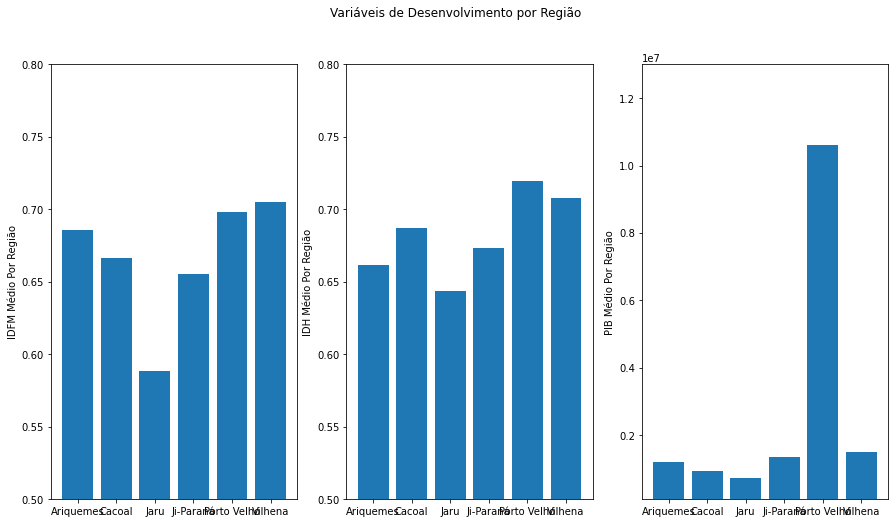

In [119]:
data1 = dict(sinasc_2.groupby('IMEDIATAS')['IFDM'].mean())
names1 = list(data1.keys())
values1 = list(data1.values())

data2 = dict(sinasc_2.groupby('IMEDIATAS')['IDHmun'].mean())
names2 = list(data2.keys())
values2 = list(data2.values())

data3 = dict(sinasc_2.groupby('IMEDIATAS')['PIB'].mean())
names3 = list(data3.keys())
values3 = list(data3.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 8), sharey=False)

axs[0].bar(names1, values1)
axs[0].set(ylim=(0.5, 0.8), ylabel='IDFM Médio Por Região')

axs[1].bar(names2, values2)
axs[1].set(ylim=(0.5, 0.8), ylabel='IDH Médio Por Região')

axs[2].bar(names3, values3)
axs[2].set(ylim=(100000, 13000000), ylabel='PIB Médio Por Região')

fig.suptitle('Variáveis de Desenvolvimento por Região')